In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
from Functions import *

In [32]:
credit = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_credit_card_balance.csv')

In [33]:
credit.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788


SK_ID_PREV: ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit),hashed

SK_ID_CURR: ID of loan in our sample,hashed

MONTHS_BALANCE: Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application

AMT_BALANCE: Balance during the month of previous credit,

AMT_CREDIT_LIMIT_ACTUAL: Credit card limit during the month of the previous credit,

AMT_DRAWINGS_ATM_CURRENT: Amount drawing at ATM during the month of the previous credit,

AMT_DRAWINGS_CURRENT: Amount drawing during the month of the previous credit,

AMT_DRAWINGS_OTHER_CURRENT: Amount of other drawings during the month of the previous credit,

AMT_DRAWINGS_POS_CURRENT: Amount drawing or buying goods during the month of the previous credit,

AMT_INST_MIN_REGULARITY: Minimal installment for this month of the previous credit,

AMT_PAYMENT_CURRENT: How much did the client pay during the month on the previous credit,

AMT_PAYMENT_TOTAL_CURRENT: How much did the client pay during the month in total on the previous credit,

AMT_RECEIVABLE_PRINCIPAL: Amount receivable for principal on the previous credit,

AMT_RECIVABLE: Amount receivable on the previous credit,

AMT_TOTAL_RECEIVABLE: Total amount receivable on the previous credit,

CNT_DRAWINGS_ATM_CURRENT: Number of drawings at ATM during this month on the previous credit,

CNT_DRAWINGS_CURRENT: Number of drawings during this month on the previous credit,

CNT_DRAWINGS_OTHER_CURRENT: Number of other drawings during this month on the previous credit,

CNT_DRAWINGS_POS_CURRENT: Number of drawings for goods during this month on the previous credit,

CNT_INSTALMENT_MATURE_CUM: Number of paid installments on the previous credit,

NAME_CONTRACT_STATUS: Contract Status (Active, Signed,...) on the previous credit,

SK_DPD: DPD (Days past due) during the month on the previous credit,

SK_DPD_DEF: DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit.

# Pre check overall Dataframe

In [34]:
credit_check = pre_check_tool(credit)
credit_check.split_data()

In [35]:
# Check null percent
credit_check.check_per_null()

,number_missing,percent_missing
AMT_PAYMENT_CURRENT,620093,19.210029
AMT_DRAWINGS_ATM_CURRENT,605754,18.765817
AMT_DRAWINGS_OTHER_CURRENT,605754,18.765817
AMT_DRAWINGS_POS_CURRENT,605754,18.765817
CNT_DRAWINGS_ATM_CURRENT,605754,18.765817
CNT_DRAWINGS_OTHER_CURRENT,605754,18.765817
CNT_DRAWINGS_POS_CURRENT,605754,18.765817
AMT_INST_MIN_REGULARITY,264384,8.190423
CNT_INSTALMENT_MATURE_CUM,264384,8.190423


In [36]:
# find cols that have null > 90%
print(credit_check.find_null_cols(0.9))

Index([], dtype='object')


NO COLUMNS HAVE NULL VALUES > 90% -> SO WE'RE KEEPING THE DATASET AS IT IS FOR NOW

In [37]:
#duplicate check
credit.duplicated().sum()

0

In [38]:
# valid value
## Num data
credit_check.check_value_num()
print('\n\n\n')

## cat data
credit_check.check_value_cat()

SK_ID_PREV  has     >0 3227965,  =0 0  ,   <0 0,    nan: 0,   other values: 0
MONTHS_BALANCE  has     >0 0,  =0 0  ,   <0 3227965,    nan: 0,   other values: 0
AMT_BALANCE  has     >0 1440575,  =0 1785423  ,   <0 1967,    nan: 0,   other values: 0
AMT_CREDIT_LIMIT_ACTUAL  has     >0 2598403,  =0 629562  ,   <0 0,    nan: 0,   other values: 0
AMT_DRAWINGS_ATM_CURRENT  has     >0 365140,  =0 2257070  ,   <0 1,    nan: 605754,   other values: 0
AMT_DRAWINGS_CURRENT  has     >0 522034,  =0 2705929  ,   <0 2,    nan: 0,   other values: 0
AMT_DRAWINGS_OTHER_CURRENT  has     >0 10847,  =0 2611364  ,   <0 0,    nan: 605754,   other values: 0
AMT_DRAWINGS_POS_CURRENT  has     >0 218149,  =0 2404062  ,   <0 0,    nan: 605754,   other values: 0
AMT_INST_MIN_REGULARITY  has     >0 1374847,  =0 1588734  ,   <0 0,    nan: 264384,   other values: 0
AMT_PAYMENT_CURRENT  has     >0 2279241,  =0 328631  ,   <0 0,    nan: 620093,   other values: 0
AMT_PAYMENT_TOTAL_CURRENT  has     >0 1419959,  =0 180800

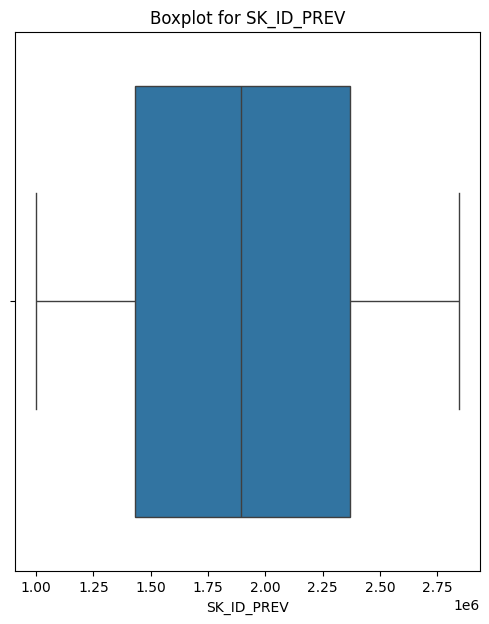

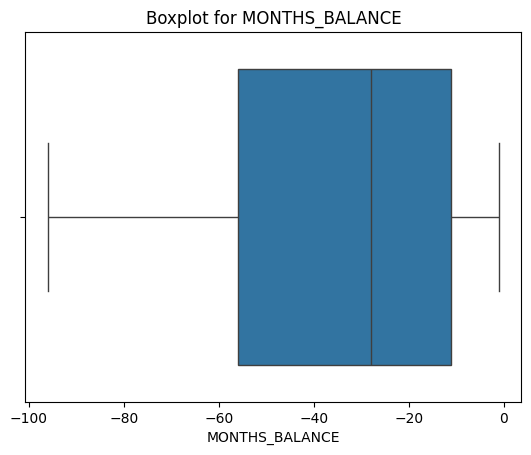

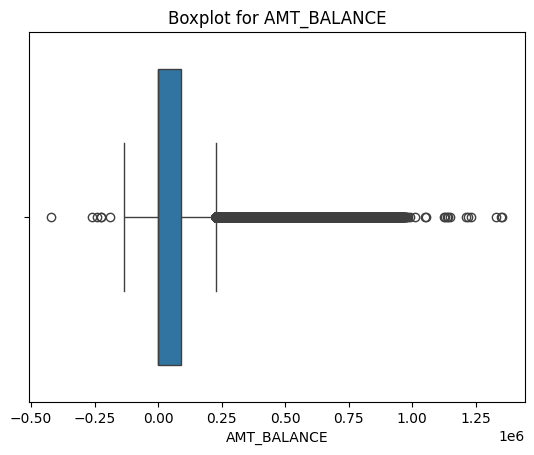

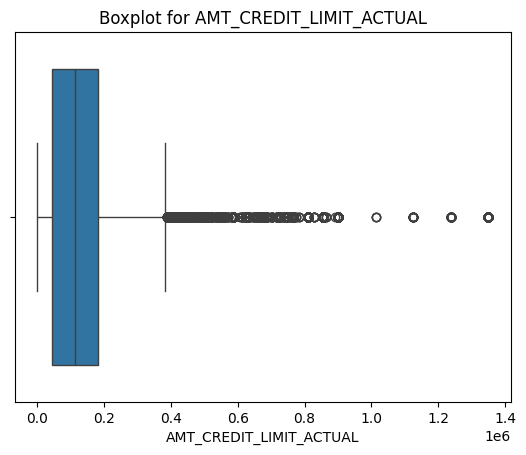

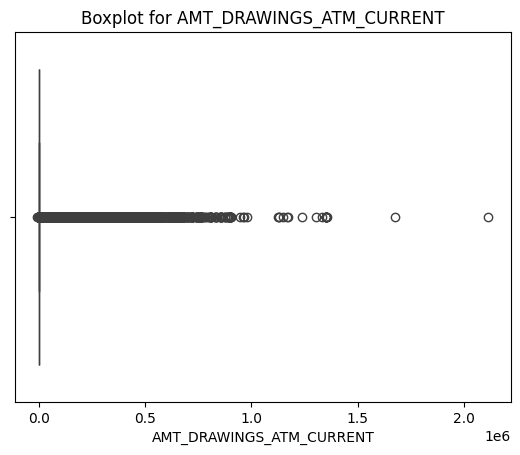

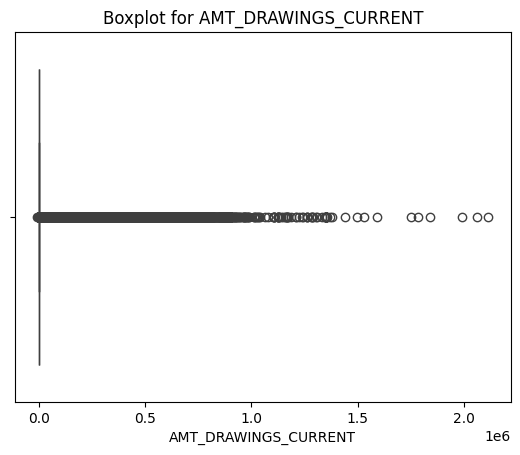

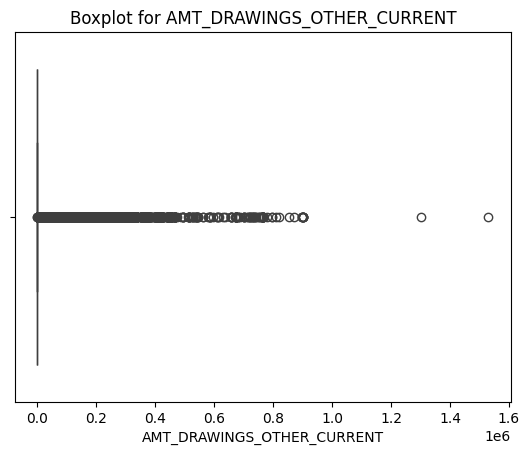

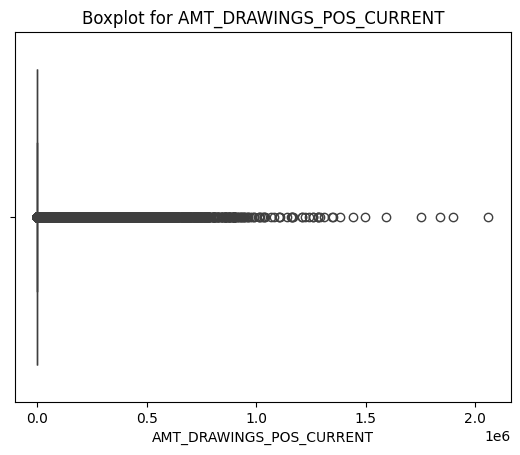

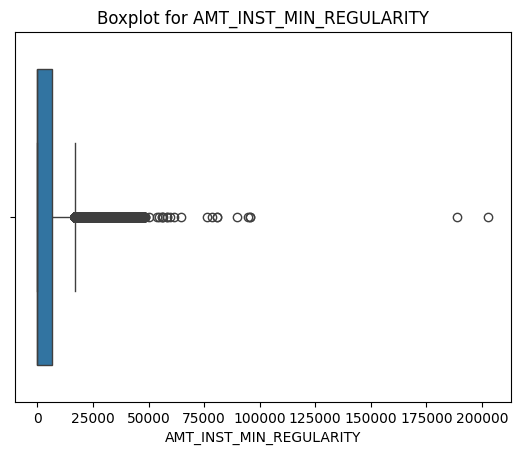

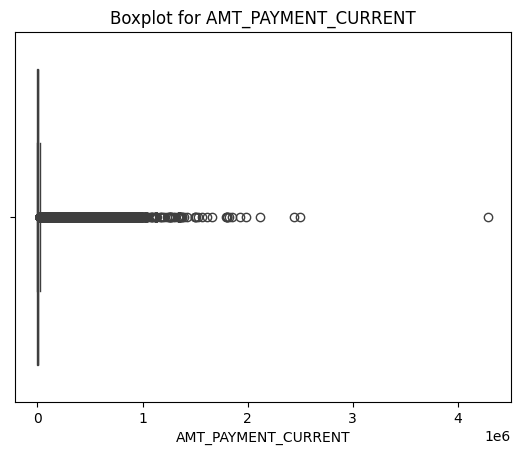

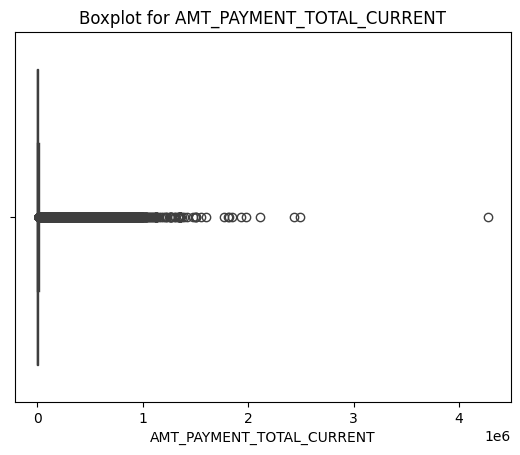

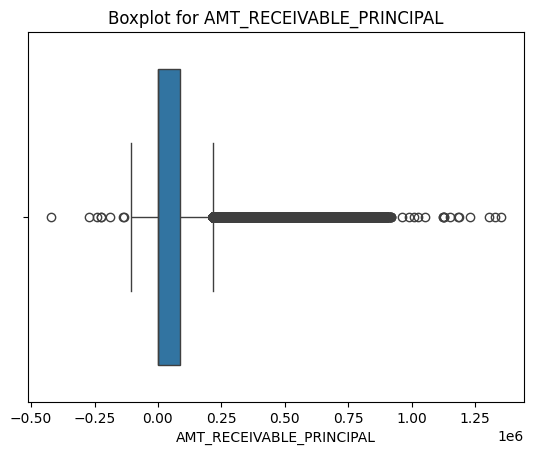

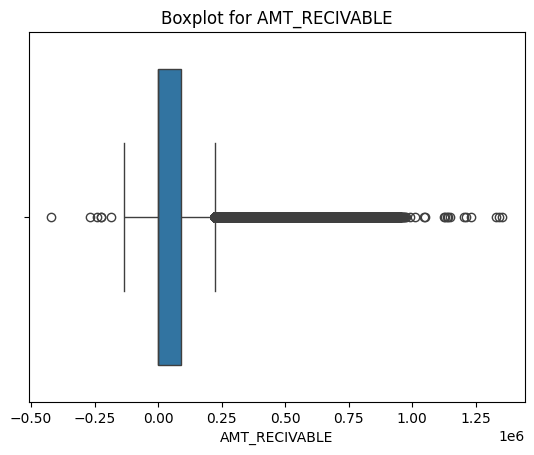

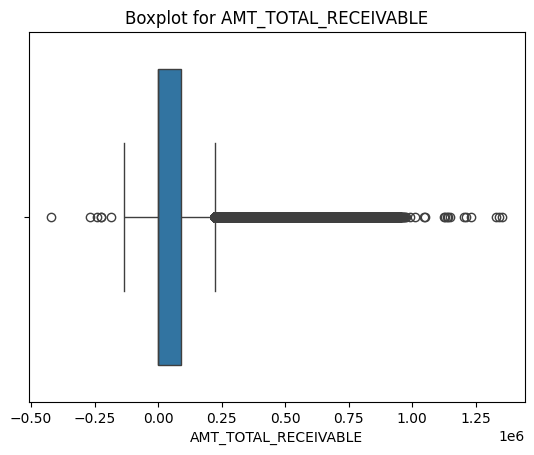

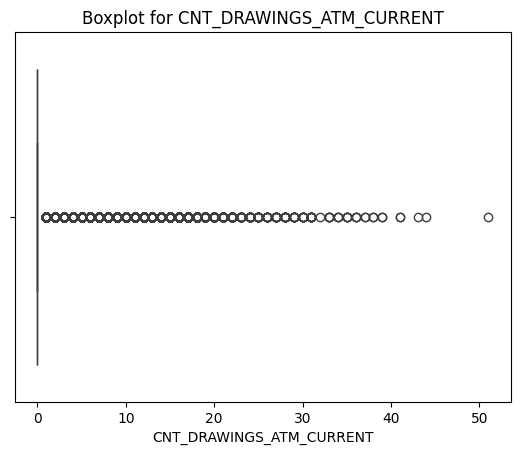

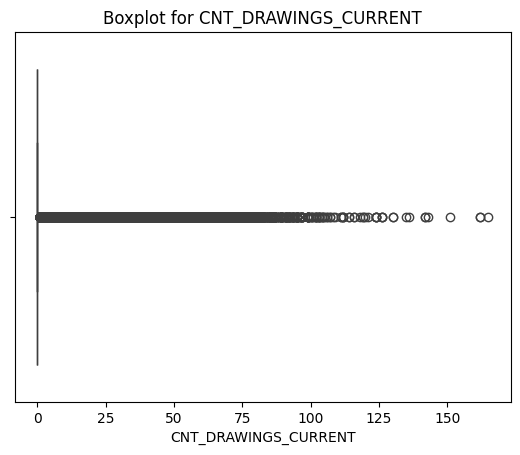

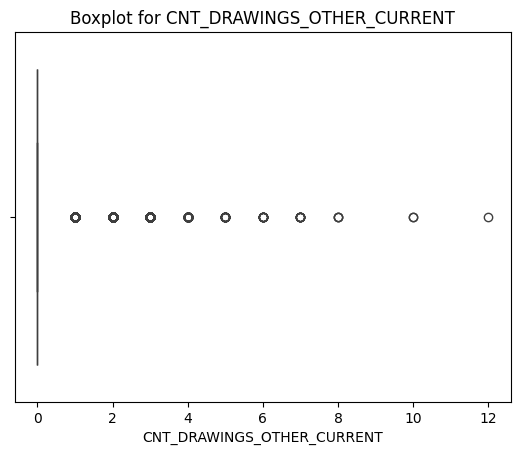

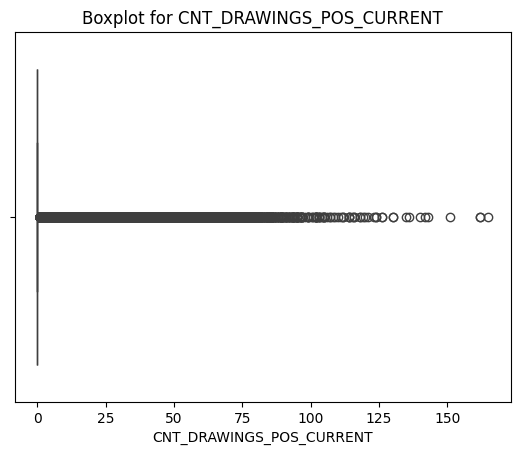

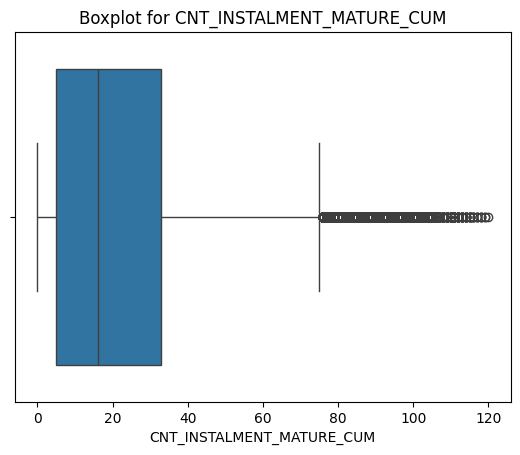

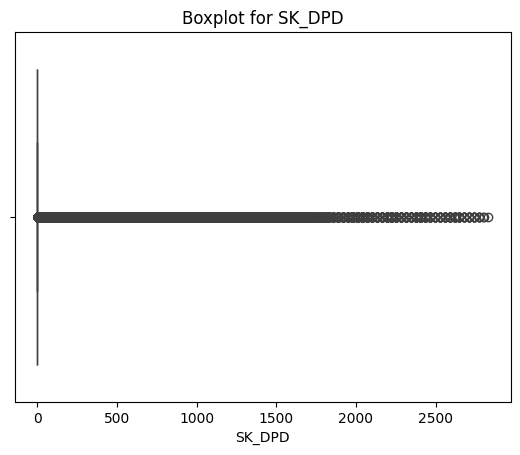

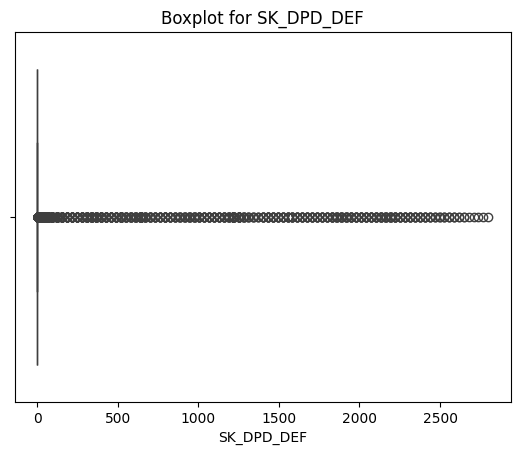

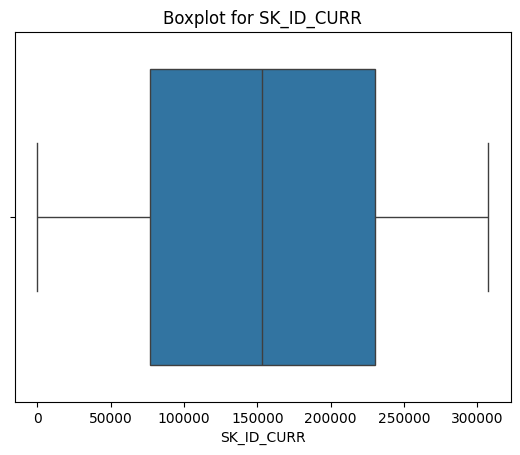

In [39]:
# Outliers 
credit_check.show_outliers()

In [40]:
credit_check.catdf

,NAME_CONTRACT_STATUS
0,Active
1,Active
2,Active
3,Active
4,Active
...,...
3227960,Active
3227961,Active
3227962,Active
3227963,Active


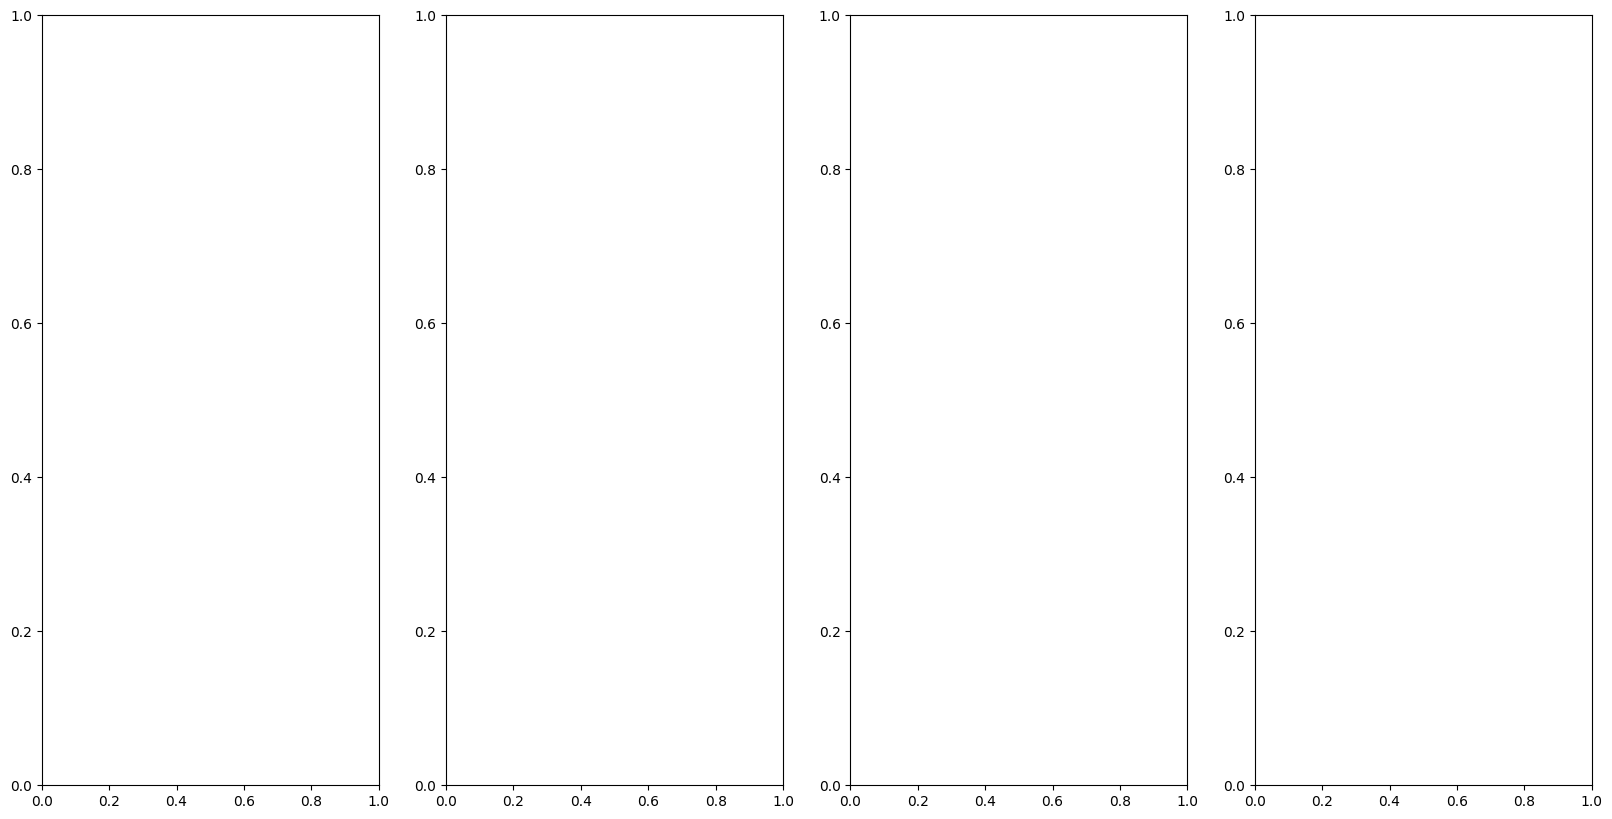

In [41]:
credit_check.dist_catchart()

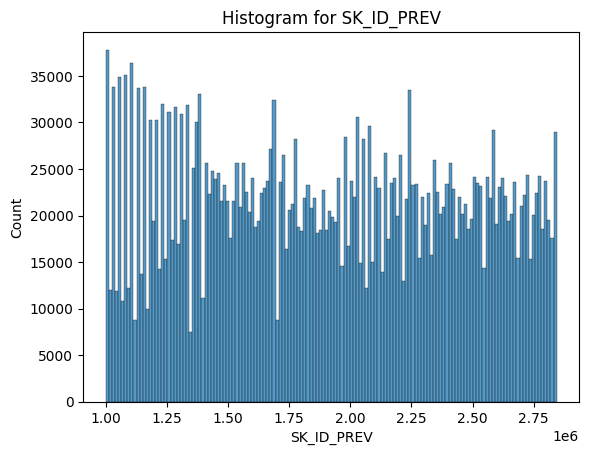

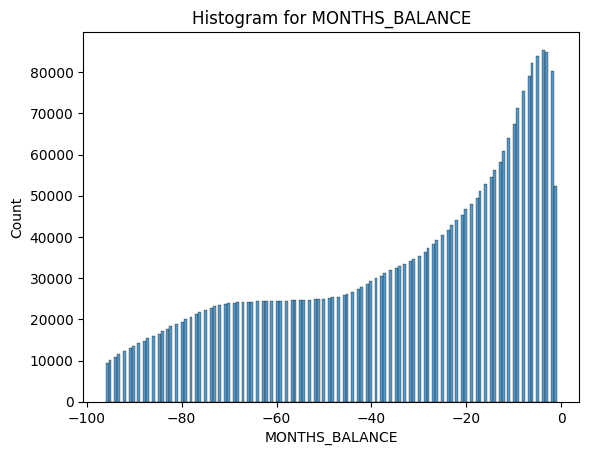

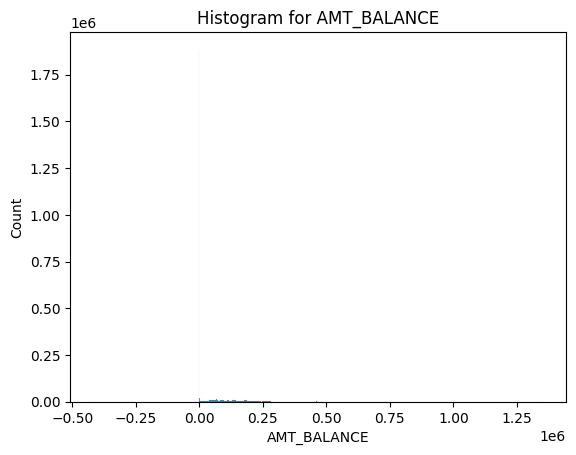

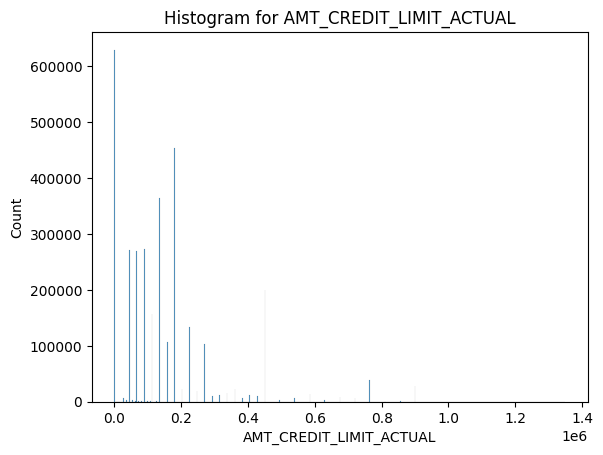

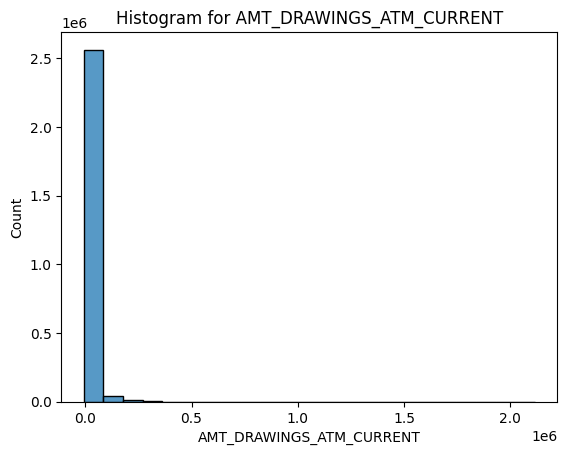

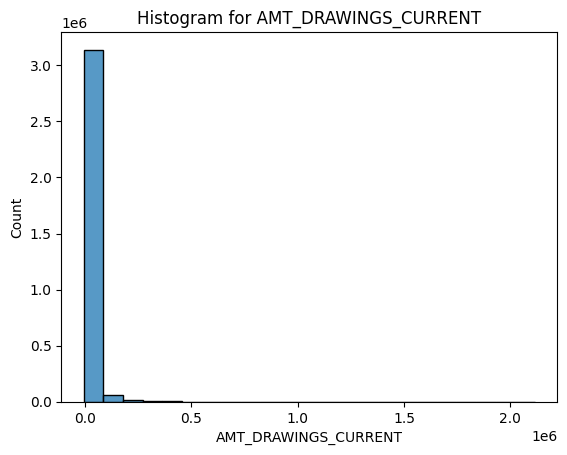

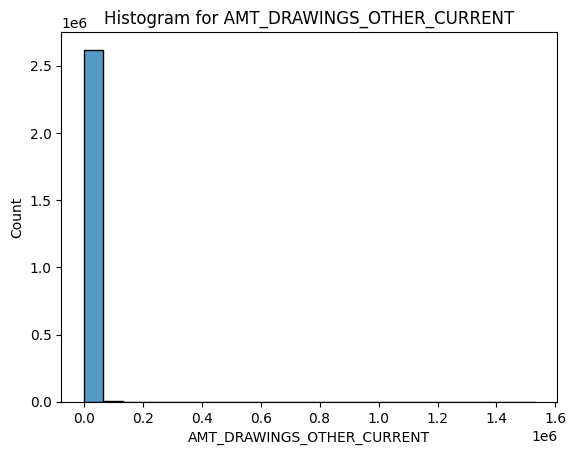

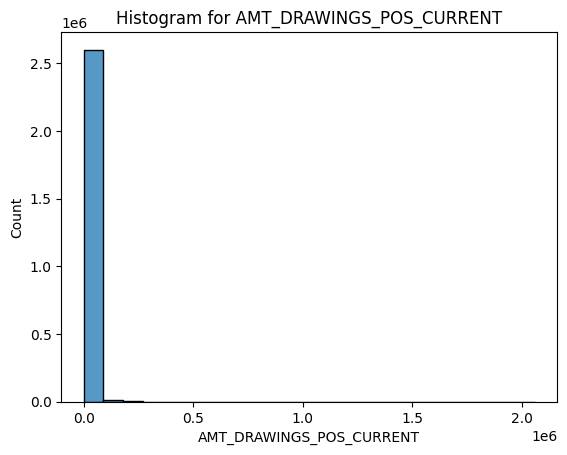

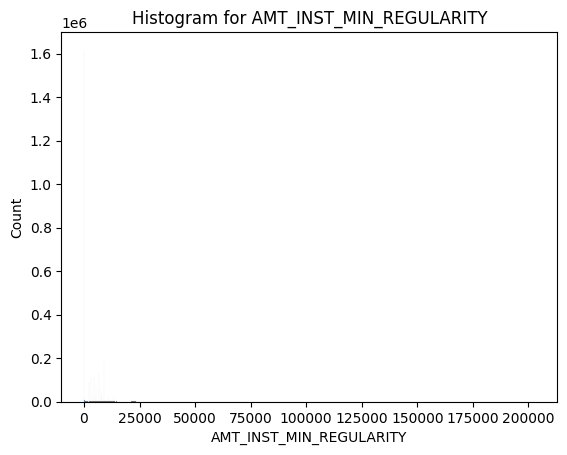

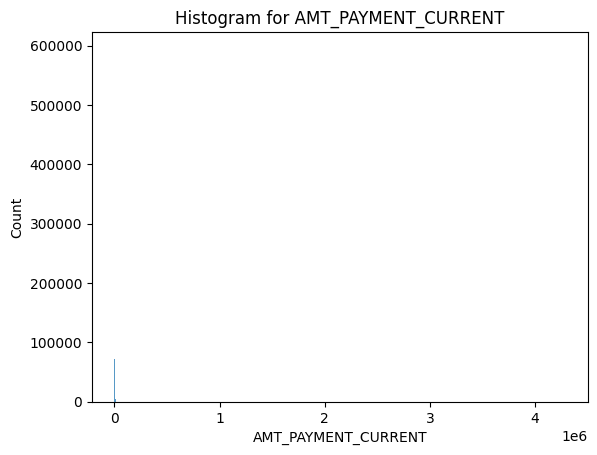

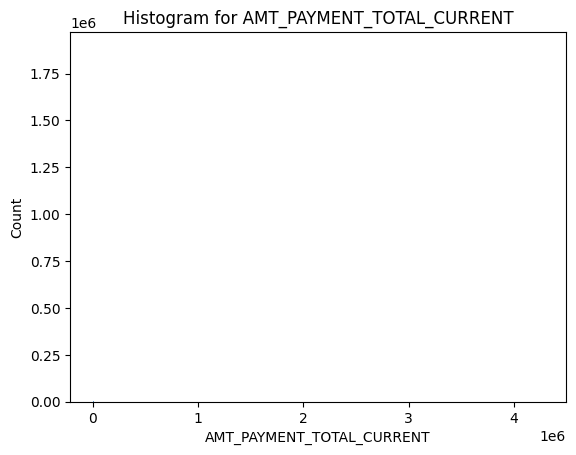

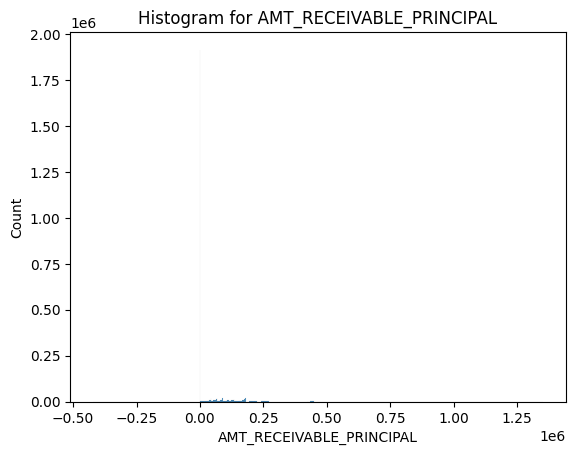

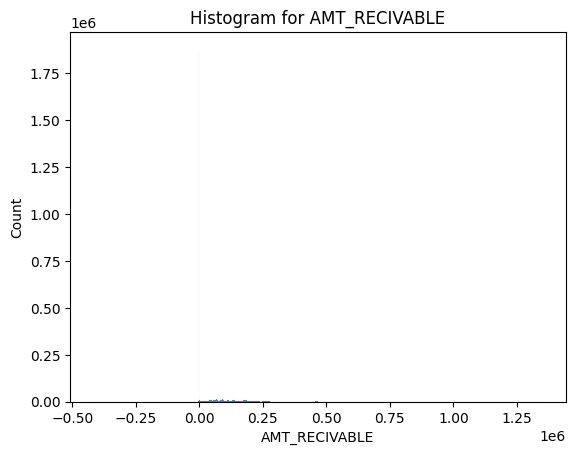

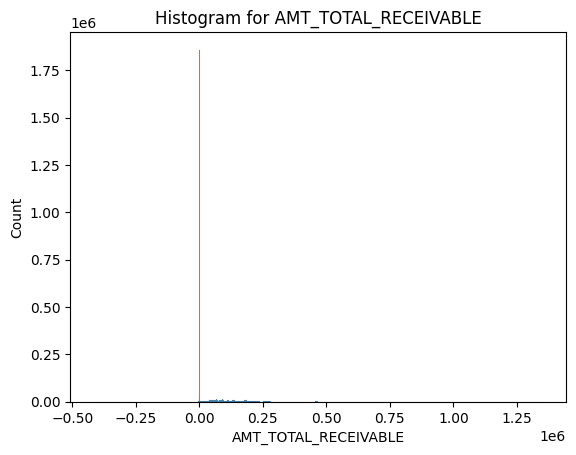

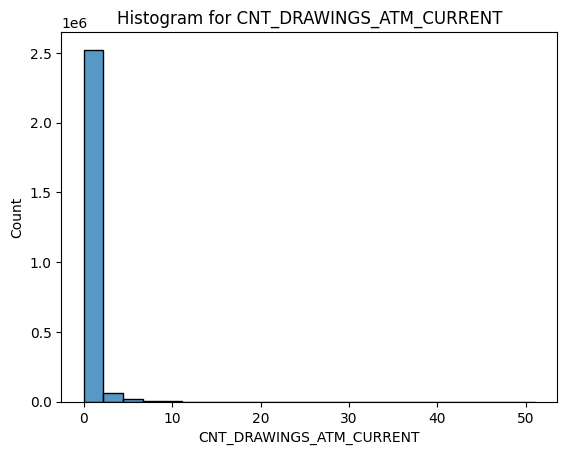

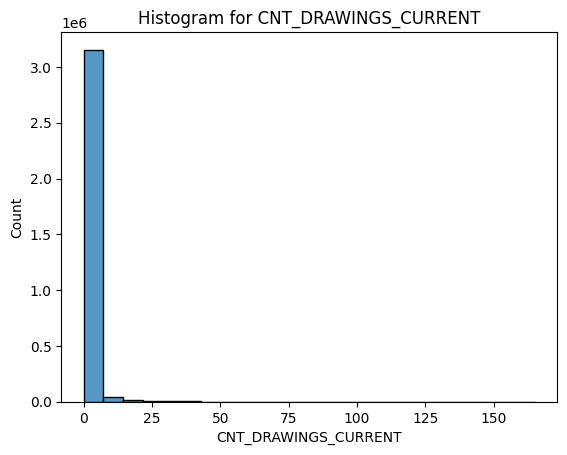

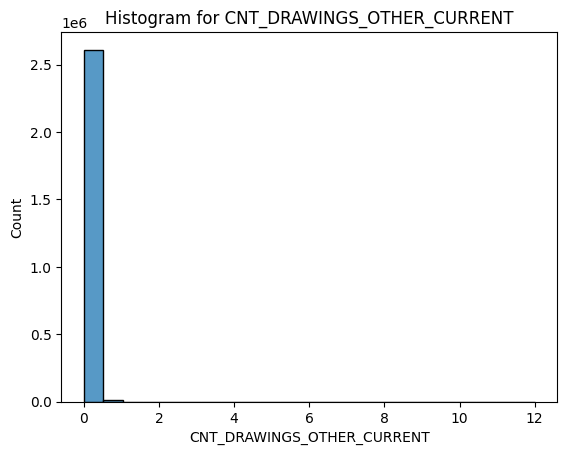

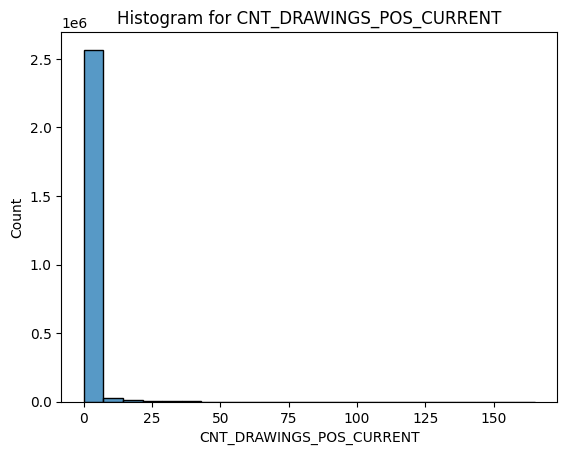

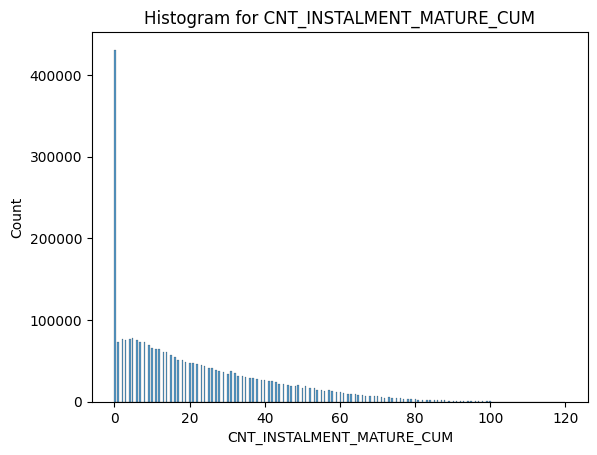

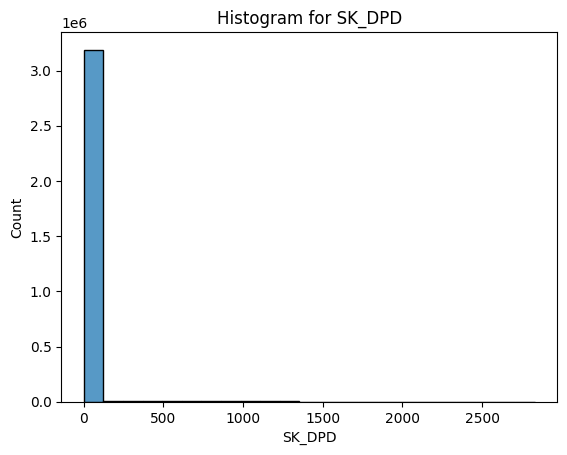

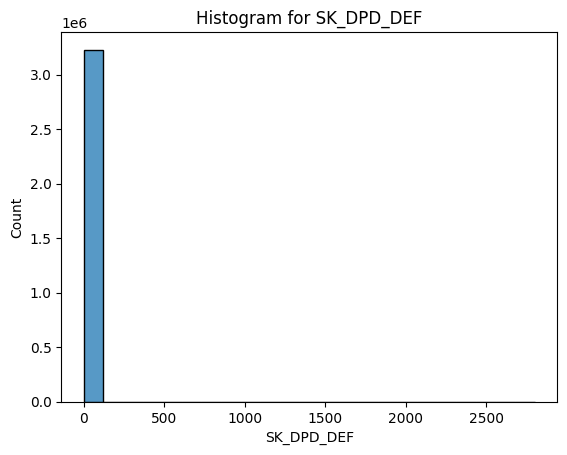

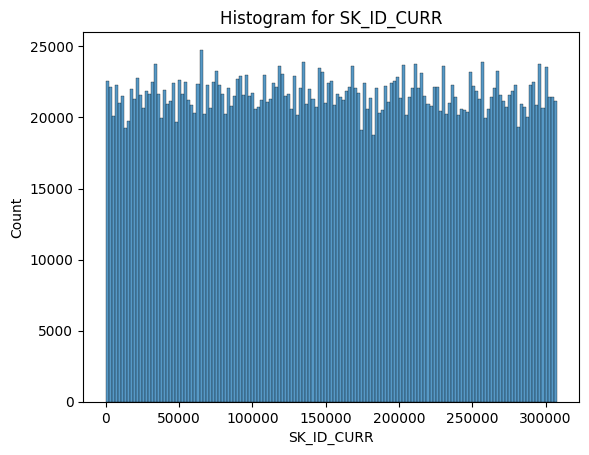

In [42]:
credit_check.dist_numchart()

# Data Exploration

# EDA Internal

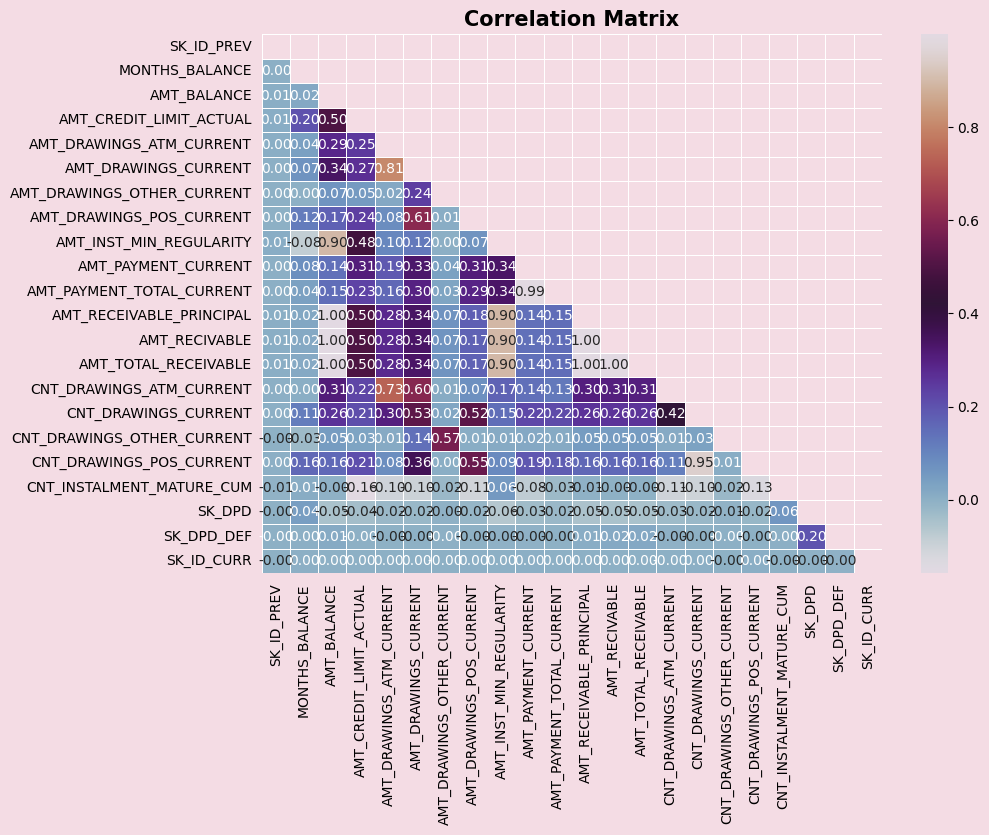

In [43]:
num = credit_check.numdf
cat = credit_check.catdf
# Correlation
draw_corr(num)

### Feature couples that has high correlation: 
* AMT_BALANCE - AMT_RECEIVABLE_PRINCIPAL (1.00)
* AMT_BALANCE - AMT_RECIVABLE (1.00)
* AMT_BALANCE - AMT_TOTAL_RECEIVABLE (1.00)
* AMT_PAYMENT_CURRENT - AMT_PAYMENT_TOTAL_CURRENT (0.99)
* CNT_DRAWINGS_CURRENT - CNT_DRAWINGS_POS_CURRENT (0.95)
* AMT_INST_MIN_REGULARITY - AMT_BALANCE (0.90)
* AMT_INST_MIN_REGULARITY - AMT_RECEIVABLE_PRINCIPAL (0.90)
* AMT_INST_MIN_REGULARITY - AMT_RECIVABLE (0.90)
* AMT_INST_MIN_REGULARITY - AMT_TOTAL_RECEIVABLE (0.90)

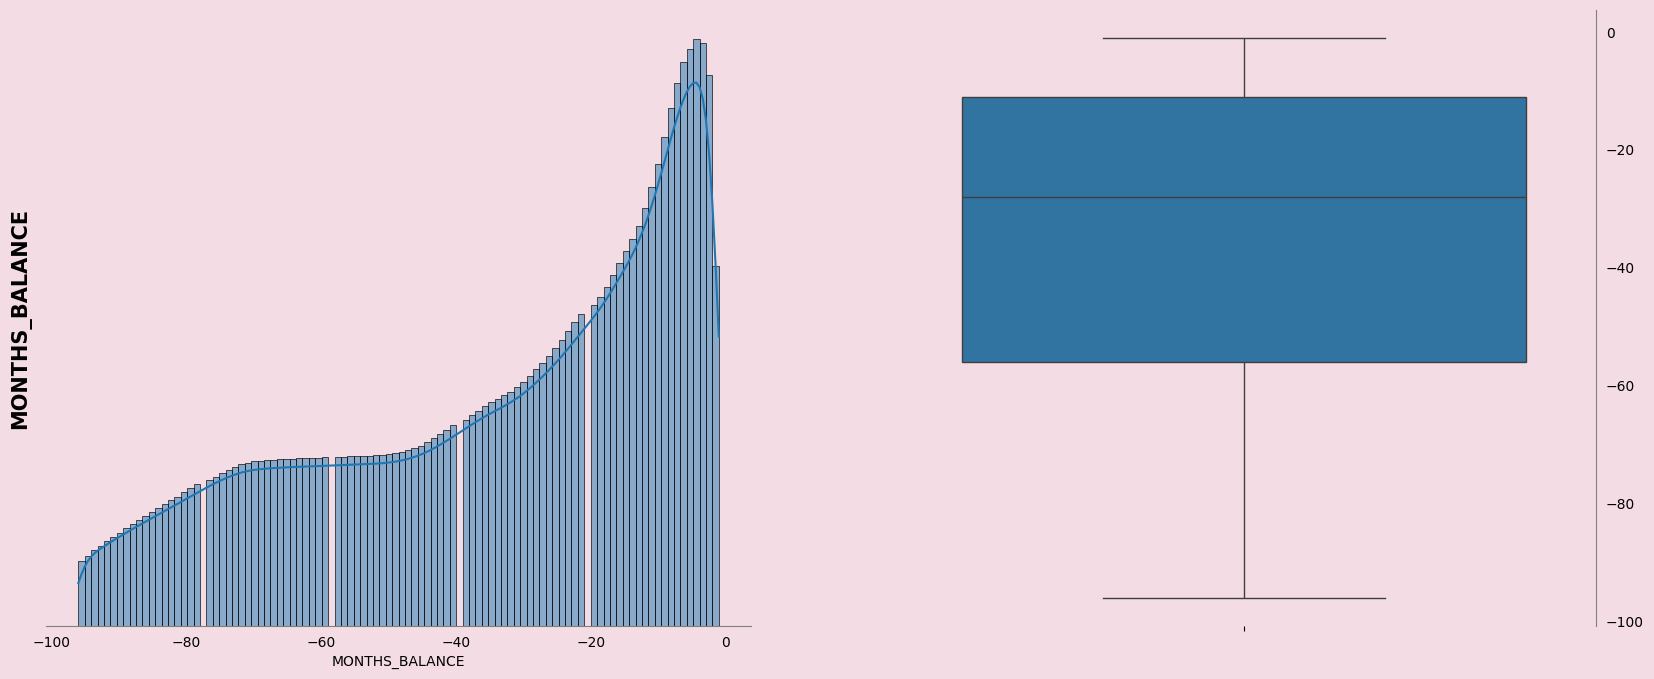

In [44]:
obj1_int = Univariate_Analysis(df= credit , col= 'MONTHS_BALANCE', num= True)
obj1_int.visualize()

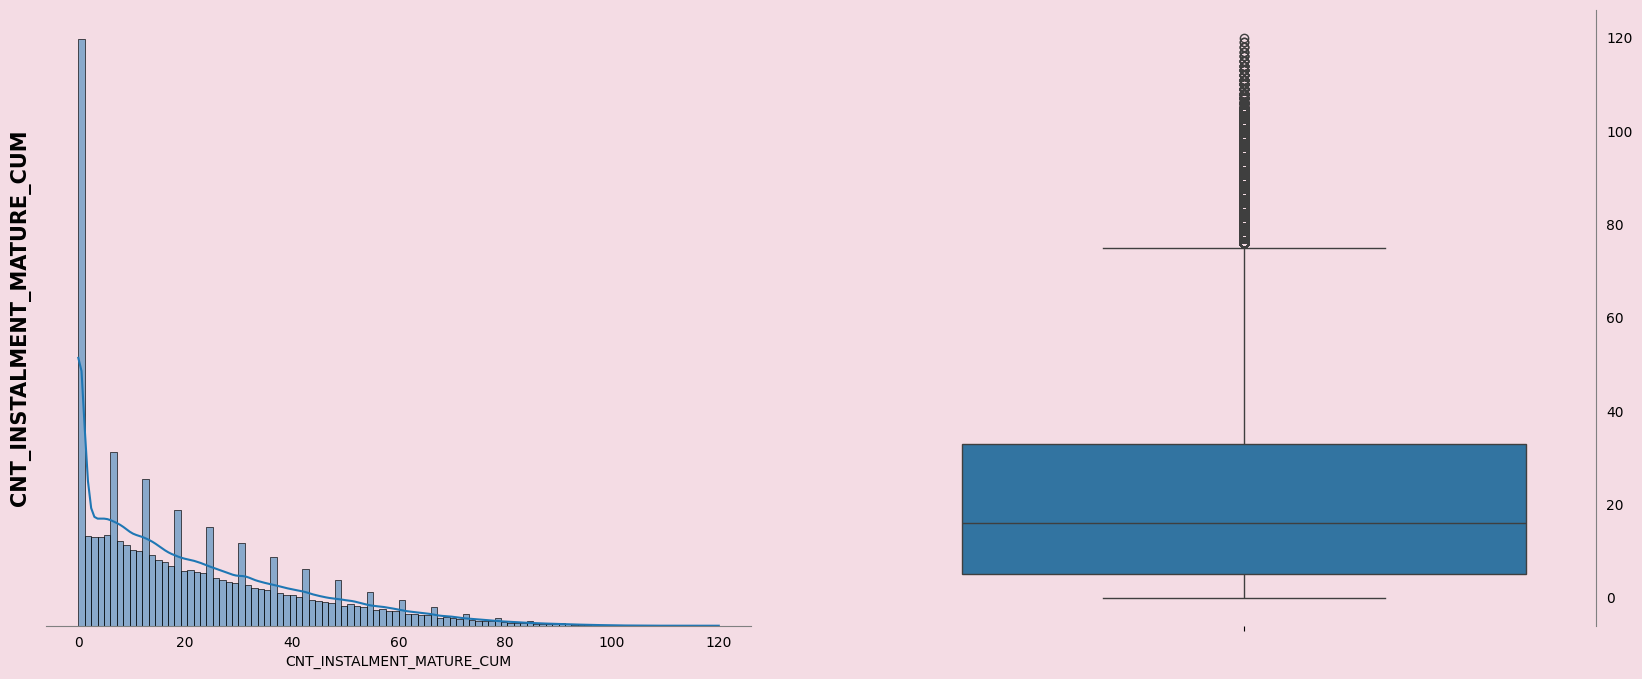

In [45]:
obj2_int = Univariate_Analysis(df= credit , col= 'CNT_INSTALMENT_MATURE_CUM', num= True)
obj2_int.visualize()

* Most of the clients have Months_Balance between 0–10 months before the application date.
* As we can see from the Boxplot and the detailed Feature Description of ‘Cnt_Instalment_Mature_Cum’ (number of paid instalments on the previous credit), the minimum value is 0 whereas the maximum value is 120. 75% of the total values lying are less than 32.

# EDA External

In [46]:
app_train = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [47]:
merge_table = pd.merge(credit,app_train,on='SK_ID_CURR',how='left')
merge_table

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,TARGET
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,1.0,1,0.0,0.0,69.0,Active,0,0,87788,1.0
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,0.0,0,0.0,0.0,18.0,Active,0,0,87788,1.0
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,0.0,0,0.0,0.0,16.0,Active,0,0,87788,1.0
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,0.0,0,0.0,0.0,63.0,Active,0,0,87788,1.0
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,4.0,4,0.0,0.0,41.0,Active,0,0,87788,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1551072,-1,0.000,202500,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,0,NaN,NaN,0.0,Active,0,0,259579,0.0
3227961,2339982,-1,0.000,45000,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0,0.0,0.0,0.0,Active,0,0,220697,0.0
3227962,2720102,-1,0.000,225000,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,0,NaN,NaN,0.0,Active,0,0,93573,0.0
3227963,1897864,-2,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,0,NaN,NaN,0.0,Active,0,0,11072,0.0


In [48]:
credit["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

NAME_CONTRACT_STATUS
Active           96.552255
Completed         3.098887
Signed            0.307903
Demand            0.026116
Sent proposal     0.014250
Refused           0.000434
Approved          0.000155
Name: proportion, dtype: float64

In [49]:
credit_filter = merge_table.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()

In [50]:
credit_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,TARGET
0,0,1745718,-1,12814.605,180000,0.0,25976.250,0.0,25976.250,0.000,...,12814.605,0.0,10,0.0,10.0,1.0,Active,0,0,0.0
1,1,1723965,-1,218401.290,225000,0.0,0.000,0.0,0.000,11274.165,...,218401.290,0.0,0,0.0,0.0,8.0,Active,0,0,1.0
2,3,2613228,-1,140479.155,135000,0.0,3653.055,0.0,3653.055,7008.615,...,138771.090,0.0,3,0.0,3.0,9.0,Active,0,0,0.0
3,7,2765329,-1,0.000,0,NaN,0.000,NaN,NaN,0.000,...,0.000,NaN,0,NaN,NaN,0.0,Completed,0,0,0.0
4,9,1989688,-1,0.000,0,0.0,0.000,0.0,0.000,0.000,...,0.000,0.0,0,0.0,0.0,1.0,Completed,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87447,307501,1682952,-3,0.000,247500,NaN,0.000,NaN,NaN,0.000,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0.0
87448,307504,1025205,-1,0.000,45000,0.0,0.000,0.0,0.000,0.000,...,0.000,0.0,0,0.0,0.0,40.0,Active,0,0,0.0
87449,307505,2764693,-4,0.000,135000,NaN,0.000,NaN,NaN,0.000,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0.0
87450,307508,1320688,-1,0.000,900000,NaN,0.000,NaN,NaN,0.000,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,NaN


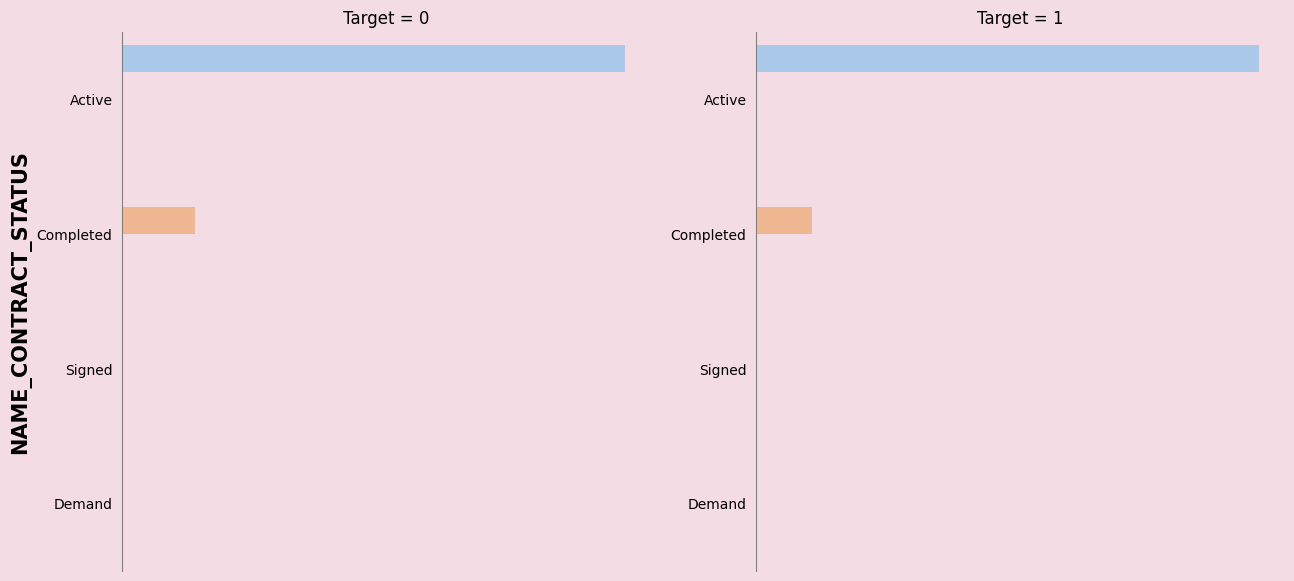

In [51]:
obj1 = Bivariate_Analysis(df = credit_filter, col1= 'NAME_CONTRACT_STATUS', num= False)
obj1.countplot()

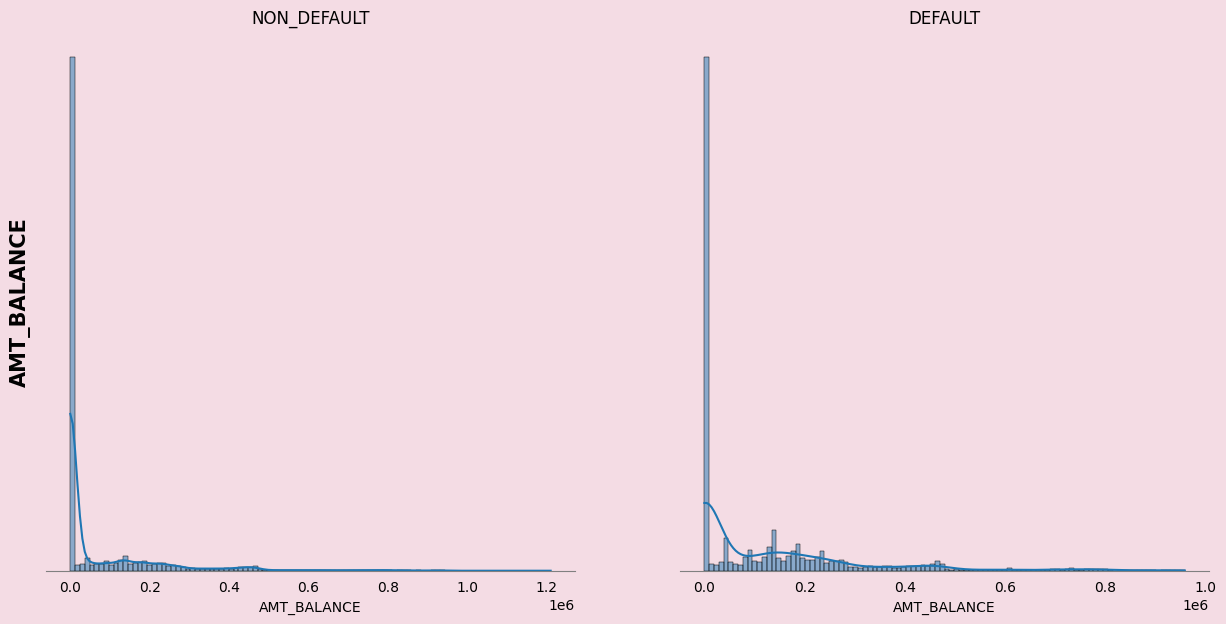

In [52]:
obj2 = Bivariate_Analysis(df = credit_filter, col1= 'AMT_BALANCE', num= True)
obj2.plothistogram()

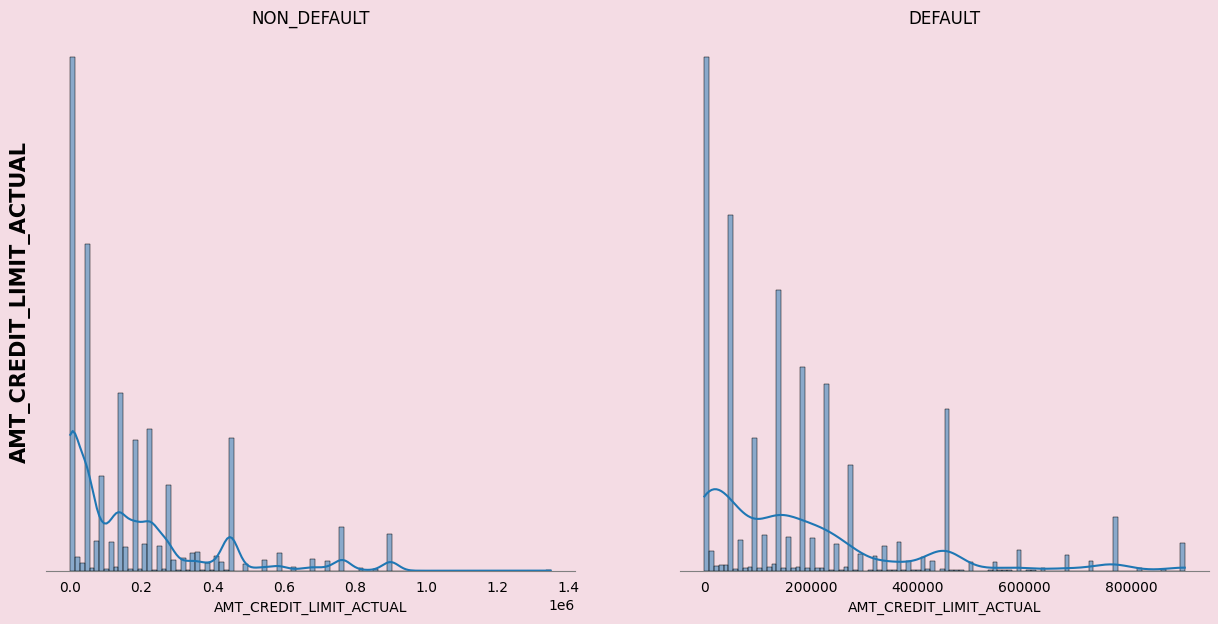

In [53]:
obj3 = Bivariate_Analysis(df = credit_filter, col1= 'AMT_CREDIT_LIMIT_ACTUAL', num= True)
obj3.plothistogram()

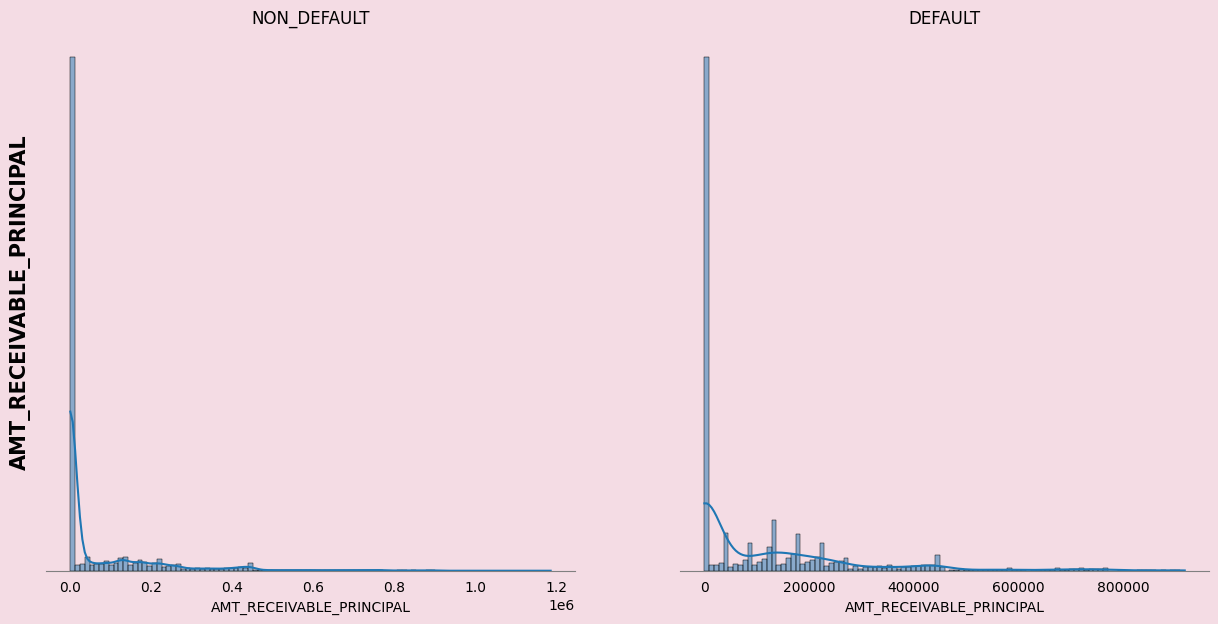

In [54]:
obj4 = Bivariate_Analysis(df = credit_filter, col1= 'AMT_RECEIVABLE_PRINCIPAL', num= True)
obj4.plothistogram()

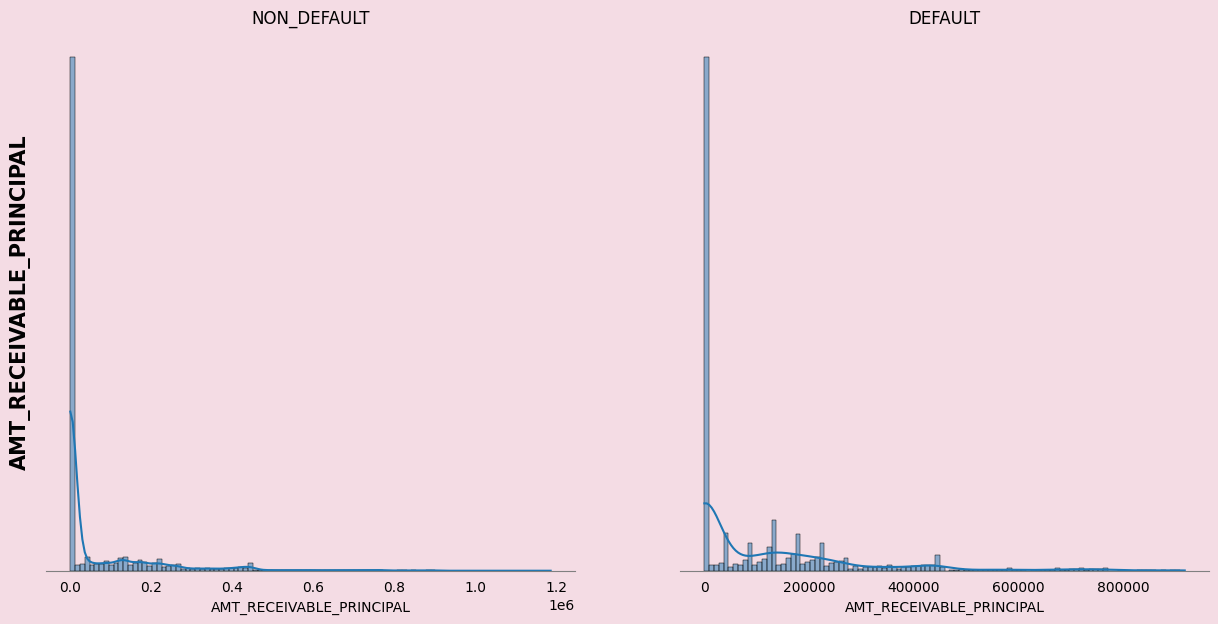

In [55]:
obj5 = Bivariate_Analysis(df = credit_filter, col1= 'AMT_RECEIVABLE_PRINCIPAL', num= True)
obj5.plothistogram()

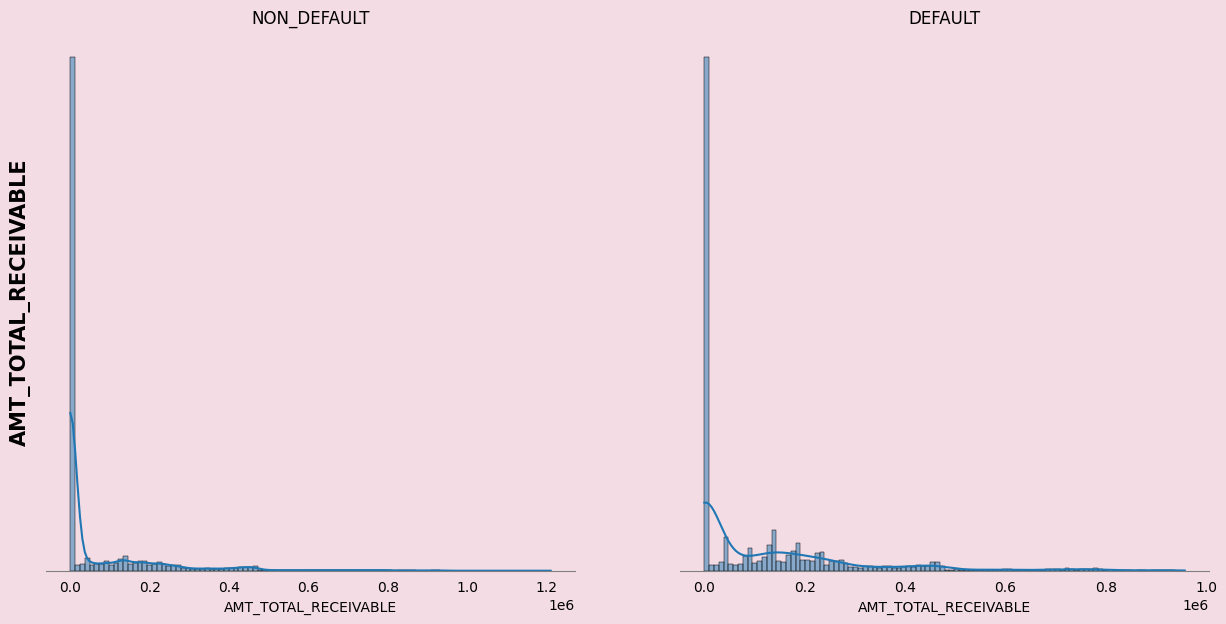

In [56]:
obj6 = Bivariate_Analysis(df = credit_filter, col1= 'AMT_TOTAL_RECEIVABLE', num= True)
obj6.plothistogram()